### Four Types of Analytics
![chart](4-types-of-data-analytics-01.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Let's get some data and take a look

In [2]:
people_df = pd.read_csv('data/people.csv')

##### Statistics is decision making in the face of uncertainty or variablity
 - GOAL: can we understand the metrics that explain how many years a person played sports?

In [3]:
people_df.head()

,name,age,sex,height,weight,bmi,sibling_count,birth_order,years_played_sports
0,Jin,15,M,66,165,26.63,4,5,5
1,Sue,24,F,62,136,24.87,2,1,10
2,Ellen,23,F,69,167,24.66,3,2,8
3,Tina,18,F,67,140,18.79,1,2,0
4,Jerry,47,M,66,182,29.37,1,1,5


### Common descriptive statistics
 - measures of central tendency (mean, median, mode)
 - measures of variability (standard deviation, variance)
 - distribution metrics (quartiles, interquartile range, outliers)

In [4]:
people_df.describe()

,age,height,weight,bmi,sibling_count,birth_order,years_played_sports
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,39.000000,67.500000,169.950000,25.76000,1.850000,2.000000,9.900000
std,18.948684,4.223992,29.653215,3.78468,1.598519,1.169795,13.863621
min,15.000000,57.000000,111.000000,16.88000,0.000000,1.000000,0.000000
25%,22.750000,66.000000,150.750000,24.65250,1.000000,1.000000,1.000000
50%,35.000000,67.500000,166.000000,26.62500,1.500000,2.000000,4.500000
75%,54.000000,69.250000,187.750000,27.73750,3.000000,3.000000,10.000000
max,74.000000,78.000000,234.000000,33.11000,6.000000,5.000000,45.000000


 -  What are the mean, median and mode for `weight`?

In [7]:
# mean is 169.95
# median is 166
# mode is 140
people_df.weight.value_counts().head(2)

140    2
159    1
Name: weight, dtype: int64

 - What are the following values for `years_played_sports`?
    - Minimum  
    - Maximum  
    - 1st Quartile  
    - 2nd Quartile  
    - 3rd Quartile  
    - Interquartile Range (IQR) (Difference between the 1st and 3rd quartiles) 

In [10]:
# IQR = 9
low_outliers = 1-(1.5 * 9)
print(low_outliers)
high_outliers = 10 + (1.5 * 9)
print(high_outliers)

-12.5
23.5


- Outliers can be mathematically determined. They are values that fall below (Q1 − 1.5 IQR) or above (Q3 + 1.5 IQR)
    - how many outliers are there for `years_played_sports`?

4


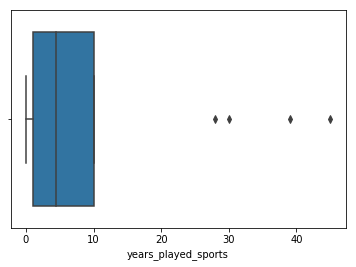

In [15]:
print(len(people_df.loc[(people_df.years_played_sports < -12.5) | (people_df.years_played_sports > 23.5)]))
sns.boxplot(people_df.years_played_sports);

### [Correlations](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php) help us understand if variables _may_ have an underlying relationship
- a perfect positive correlation is 1.0
- a perfect negative correlation is -1.0
- interpreting correlation depends on the context and purpose!


In [16]:
people_df.corr()

,age,height,weight,bmi,sibling_count,birth_order,years_played_sports
age,1.000000,0.082854,0.397250,0.483920,0.213725,0.009498,0.519108
height,0.082854,1.000000,0.704878,-0.067294,-0.120820,-0.138470,-0.246262
weight,0.397250,0.704878,1.000000,0.619360,-0.207801,-0.294352,-0.209591
bmi,0.483920,-0.067294,0.619360,1.000000,-0.095000,-0.230864,0.007252
sibling_count,0.213725,-0.120820,-0.207801,-0.095000,1.000000,0.788092,0.683269
birth_order,0.009498,-0.138470,-0.294352,-0.230864,0.788092,1.000000,0.408912
years_played_sports,0.519108,-0.246262,-0.209591,0.007252,0.683269,0.408912,1.000000


 - Which variables in our dataset are most highly correlated with each other?
 - Which variables might explain the variability in `years_played_sports`?

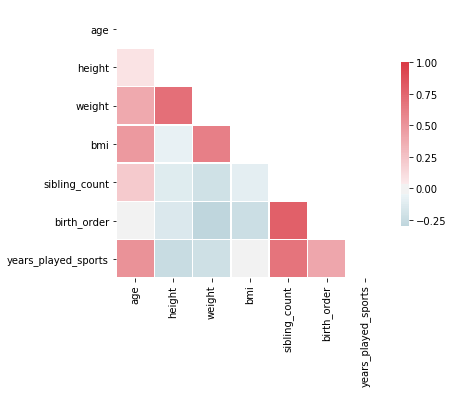

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))

corr = people_df.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Normalization
 - Does the `years_played_sports` variable have the same meaning for all people in the dataset? Is a 70 yo with 5 years of sports the same as a 20 yo with 5 years of sports?
 - How would you normalize it?

In [18]:
people_df['pct_life_sports'] = people_df.years_played_sports/people_df.age

In [19]:
people_df.corr()

,age,height,weight,bmi,sibling_count,birth_order,years_played_sports,pct_life_sports
age,1.000000,0.082854,0.397250,0.483920,0.213725,0.009498,0.519108,0.162176
height,0.082854,1.000000,0.704878,-0.067294,-0.120820,-0.138470,-0.246262,-0.300859
weight,0.397250,0.704878,1.000000,0.619360,-0.207801,-0.294352,-0.209591,-0.350483
bmi,0.483920,-0.067294,0.619360,1.000000,-0.095000,-0.230864,0.007252,-0.119337
sibling_count,0.213725,-0.120820,-0.207801,-0.095000,1.000000,0.788092,0.683269,0.774994
birth_order,0.009498,-0.138470,-0.294352,-0.230864,0.788092,1.000000,0.408912,0.573389
years_played_sports,0.519108,-0.246262,-0.209591,0.007252,0.683269,0.408912,1.000000,0.863875
pct_life_sports,0.162176,-0.300859,-0.350483,-0.119337,0.774994,0.573389,0.863875,1.000000


- Correlation between a variable you are trying to explain (sometimes called the dependent variable or target) and a variable that might explain it (independent variable or explanatory variable) helps us understand the target better.  
- Correlation between two explanatory variables may cause us to overestimate their importance to explaining the variance in the target. Think about _why_ variables might be highly correlated.
 

#### Feature Engineering

##### These could be from an external dataset or from the provided data

- features that take into account the size of the building
- comparing other metrics to find different `delta` values
- getting information for the store location (irs data for average income, e.g.)
